In [1]:
import networkx as nx
import random
import math

In [140]:
class MST:
    '''
    Class that constructs input graph and finds the Minimum Spanning Tree for a set of vertices
    '''
    def __init__(self, data):
        '''
        Take data and construct graph
        '''
        self.data = data
        self.generate_graph()
        nodes = self.graph.nodes
        
        # Initialize final edge list
        self.final_edges = []
        
    #-----------Methods-------------------
    def find_minimum_subset_tree(self):
        '''
        Run full algorithm to find minimum tree spanning subset R of V
        '''
        self.get_all_shortest_paths(self.graph)
        self.create_shortest_paths_graph()
        self.mst(self.graph)
        min_tree.get_mst_of_sp_graph()
        self.final_cost = self.get_graph_cost(self.final_edges)
        
        # generate output
        out_string = str(self.final_cost) + '\n'
        out_string += str(len(self.final_edges)) + '\n'
        
        for edge in self.final_edges:
            out_string += '{} {}\n'.format(edge[0], edge[1])
        
        return out_string
    
    def get_all_shortest_paths(self, graph):
        '''
        Calculate shortest paths between node i and node j, for all (i, j) in required vertices
        '''
        self.shortest_paths_list = []
        
        for i in range(int(self.dims[2])):
            for j in range(i+1, int(self.dims[2])):
                
                # Run Dijkstra's to compute shortest path between i and j
                self.shortest_paths_list.append(nx.shortest_path(graph, source=self.r_vertices[i], target=self.r_vertices[j], method='dijkstra'))
        
    def create_shortest_paths_graph(self):
        '''Creates graph of shortest paths between all required vertices'''
        
        self.sp_graph = nx.Graph()
        self.edge_dict = {} # Conversion dictionary for edges
        
        for sp in self.shortest_paths_list:
            # Get edges
            edges = [(sp[i], sp[i+1]) for i in range(len(sp) - 1)]
            # Get weights of edges
            tot_weight = 0
            for edge in edges:
                weight = self.graph.get_edge_data(edge[0], edge[1])['weight']
                tot_weight += weight
            # Create edge from the beginning of path to end of path, assigning total weight to edge
            self.sp_graph.add_edge(sp[0], sp[-1], weight=tot_weight)
            self.edge_dict['(\'{}\', \'{}\')'.format(sp[0], sp[-1])] = edges     
            
    def get_mst_of_sp_graph(self):
        '''
        Compute the minimum spanning tree of shortest paths graph, then create the final edge list
        '''
        self.sp_graph = self.mst(self.sp_graph)
        
        for edge in self.sp_graph.edges:
            self.final_edges.extend(self.edge_dict[str(edge)])
        
    def mst(self, graph):
        '''
        Run Prim's algorithm on given graph
        '''
        return nx.minimum_spanning_tree(graph, algorithm='prim')
            
    def generate_graph(self):
        self.dims = self.data.pop(0).split(' ')
        self.r_vertices = self.data.pop(0).split(' ')
        self.graph = nx.Graph()
        self.graph.add_nodes_from([str(i) for i in range(1, int(self.dims[0]) + 1)]) # Graph is 1-indexed
        
        for i, edge in enumerate(self.data):
            edge = edge.strip().split(' ')
            self.graph.add_edge(edge[0], edge[1], weight=int(edge[2]))
    
    def get_graph_cost(self, graph):
        cost = 0
        if isinstance(graph, list):
            for edge in graph:
                cost += self.graph.get_edge_data(edge[0], edge[1])['weight']
        else:
            for edge in graph.edges:
                cost += graph.get_edge_data(edge[0], edge[1])['weight']
                
        return cost
    
    def check_tree(self, graph):
        '''
        Run search algorithm to check if input graph is a valid tree
        '''
        return nx.is_tree(graph)
    
#     def simulate_annealing(self):
#         '''
#         Run simulated annealing algorithm to find minimum spanning tree of required vertices
#         !! WILL NOT BE USING THIS FOR ALGOBOWL UNLESS WE NEED TO!!
#         '''
#         current_state = self.generate_random_tree()
#         k_steps = 10000
#         for k in range(k_steps+1):
#             T = (k_steps - k)
#             if T <=0:
#                 return current_state
#             next_state = self.get_neighbor()
#             delta = self.get_tree_cost(next_state) - self.get_tree_cost(current_state)
#             if delta < 0:
#                 current_state = next_state
#             else:
#                 prob = random.uniform(0,1)
#                 if prob <= math.exp(-delta/T):
#                     next_state = current_state
#         return current_state
    
#     def generate_random_tree(self):
#         pass
    
#     def get_neighbor(self, tree):
#         pass

In [156]:
data = ''
with open(r'C:\\Users\\Coby\\Grad_School\\Algorithms\\algo_bowl\\algo_bowl\\inputs\\output_graph_big.txt', 'r') as x:
    for line in x:
        data = data + line
data = data.strip().split('\n')
min_tree = MST(data)
# print(min_tree.dims, min_tree.r_vertices, min_tree.graph.edges)

In [157]:
output = min_tree.find_minimum_subset_tree()
print(output)

226
223
79 163
164 41
34 84
34 25
34 18
100 201
100 196
100 234
106 249
118 217
118 104
118 254
122 137
54 126
36 221
40 233
40 163
40 194
40 262
40 139
125 49
225 116
225 20
225 31
184 93
167 49
148 182
148 12
26 210
26 33
222 141
179 43
179 71
228 47
10 48
168 266
14 133
14 68
12 114
267 233
267 210
185 150
185 171
185 28
185 6
185 257
123 96
123 133
123 186
123 23
123 170
123 105
123 221
123 117
233 46
233 150
233 182
62 43
62 127
62 178
220 173
220 116
220 30
220 243
113 47
263 3
42 73
42 92
172 70
104 89
35 156
265 133
60 66
191 253
248 96
248 102
248 81
248 37
59 4
238 30
131 142
214 70
214 207
150 169
150 1
176 199
254 180
254 110
200 149
200 266
200 119
200 19
181 47
63 153
4 52
4 192
232 252
133 237
133 154
133 218
213 257
111 157
111 208
204 44
195 55
72 96
72 129
72 230
199 147
199 80
219 252
7 73
7 66
7 136
173 46
173 217
173 70
173 149
173 147
173 65
173 43
173 261
116 107
116 44
96 46
96 153
96 188
96 226
96 90
96 73
96 78
177 70
266 189
151 70
182 201
55 46
126 210
21 25

In [158]:
min_tree.get_all_shortest_paths(min_tree.graph)
min_tree.create_shortest_paths_graph()
min_tree.mst(min_tree.graph)
min_tree.get_mst_of_sp_graph()
min_tree.get_graph_cost(min_tree.final_edges)
print(min_tree.get_graph_cost(min_tree.final_edges), min_tree.get_graph_cost(min_tree.graph))
final_tree = nx.Graph()
final_tree.add_edges_from(min_tree.final_edges)
min_tree.check_tree(final_tree)

452 909927


True

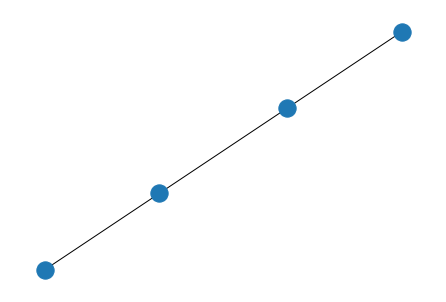

In [138]:
nx.draw(final_tree)

In [139]:
print(final_tree.edges)

[('1', '2'), ('1', '5'), ('2', '3')]
